# Workshop Machine Learning


---

Creación de un modelo predictivo basado en el naufragio del Titanic.



#1.- Carga de Librerías

In [0]:
# Linear algebra
import numpy as np 

# Data processing
import pandas as pd 

# Data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Regular expression
import re

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Metrics
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

# 2.- Lectura de archivos
a.- Cargamos en un dataframe la información que usaremos para el entrenamiento del modelo y otro set de datos para la prueba del modelo.






In [0]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

* Descripción del nombre de las columnas:

  * survival:    Survival 
  * PassengerId: Unique Id of a passenger. 
  * pclass:    Ticket class     
  * sex:    Sex     
  * Age:    Age in years     
  * sibsp:    # of siblings / spouses aboard the Titanic     
  * parch:    # of parents / children aboard the Titanic     
  * ticket:    Ticket number     
  * fare:    Passenger fare     
  * cabin:    Cabin number     
  * embarked:    Port of Embarkation

b.- Listamos los elementos del dataframe para visualizar la información cargada.

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test_df.head(8)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S


c.- Listamos el nombre de las columnas del dataframe

In [5]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
train_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# 3.- Revisando los datos

a.- Verificamos la cantidad de nulos

In [7]:
total = train_df.isnull().sum().sort_values(ascending=False)
total

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [8]:
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


b.- Analizamos la distribución de sobrevivientes por Sexo y Edad

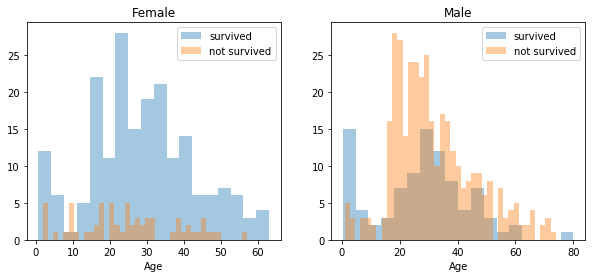

In [9]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

c.- Analizamos la distribución de sobrevivientes por Lugar de Embarque, Categoría del pasajero y Sexo

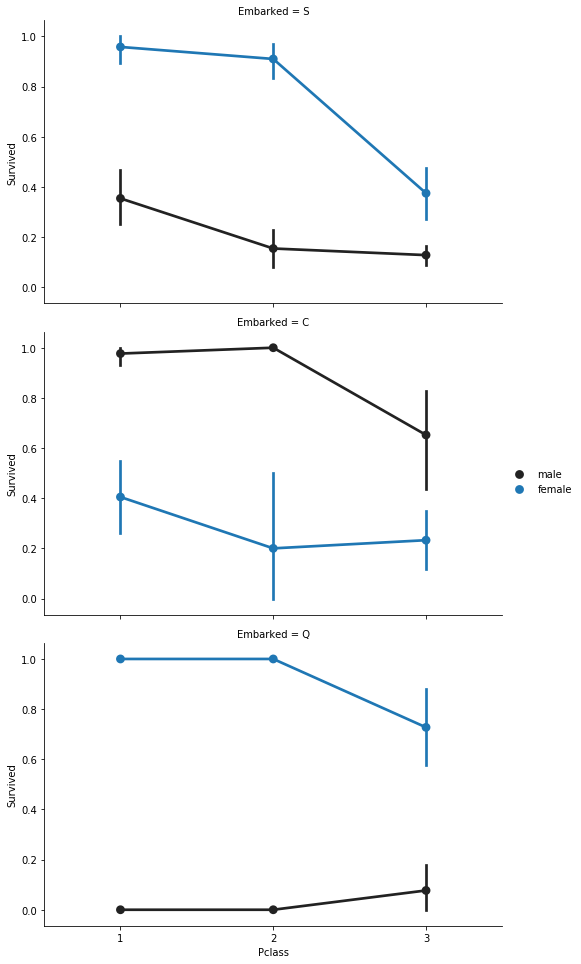

In [10]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

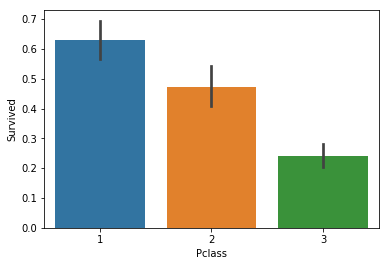

In [11]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

d.- Analizamos la distribución de sobrevivientes por Edad, Categoría del pasajero y Sexo

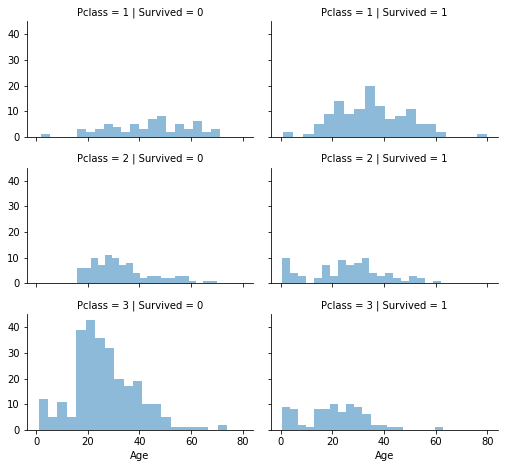

In [12]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

e.- Creamos un par de "features":

* Cantidad de parientes en el barco
* Identificador de pasajero solitario

In [13]:
def createFeatureAloneRelatives(data):  
  for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

    
data = [train_df, test_df]
createFeatureAloneRelatives(data)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

f.- Analizamos los sobrevivientes por Cantidad de parientes en el barco.

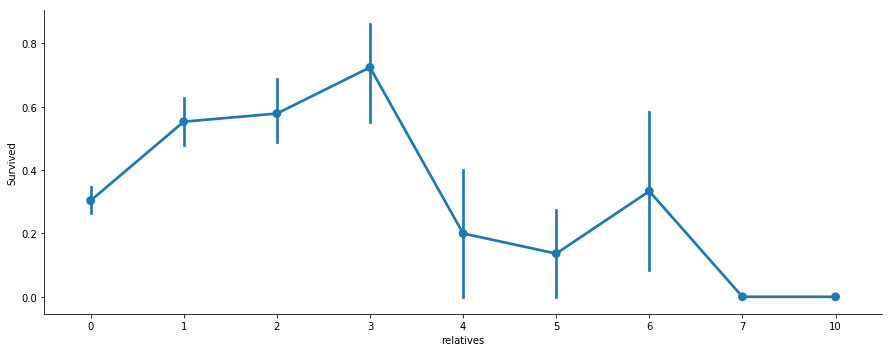

In [14]:
axes = sns.catplot('relatives','Survived', data=train_df, aspect = 2.5, kind="point")

# 4.- Tratamiento de valores nulos

a.- Realizamos lo siguiente:

* Completamos los valores null de la columna "Cabin" por el valor "U0"
* Obtenemos el valor de la letra de la cubierta a la cual pertenecia el pasajero
* Le asignamos un valor numérico a la cubierta
* Creamos un feature "Deck" para almacenar el dato de la cubierta
* Eliminamos la columna "Cabin"

In [0]:
def createDeck(data):
  deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
  for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)


data = [train_df, test_df]
createDeck(data)

train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

b.- Completamos los valores nulos de la columna "Edad"  con valores aleatorios partiendo de la media y desviación standard

In [16]:
def fillNAage(data):
  for dataset in data:
    mean = dataset["Age"].mean()
    std = dataset["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = dataset["Age"].astype(int)
    
data = [train_df, test_df]
fillNAage(data)
train_df["Age"].isnull().sum()

0

c.- Completamos los valores nulos de la columna "Embarked" con el valor más común

In [17]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [0]:
def fillNAembarked(data):
  common_value = 'S'
  for dataset in data:
      dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

data = [train_df, test_df]
fillNAembarked(data)

#5.- Tratamiento de columnas no numéricas

a.- Revisamos los tipos de dato de las columnas existentes

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
relatives      891 non-null int64
not_alone      891 non-null int64
Deck           891 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 97.5+ KB


b.- Eliminamos la columna "PassengerId"

In [0]:
train_df = train_df.drop(['PassengerId'], axis=1)

c.- Convertimos la columna "Fare" en una de tipo Int

In [0]:
def setIntFare(data):
  for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

data = [train_df, test_df]
setIntFare(data)

d.- De la columna "Name" obtenemos el título de la persona y creamos un nuevo feature con ese dato de nombre "Title". Finalmente se retira la columna "Name"

In [0]:
def createTitle(data):
  titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

  for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

data = [train_df, test_df]
createTitle(data)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

e.- Asignamos un valor numérico al feature "Sexo"

In [0]:
def setSexo(data):
  genders = {"male": 0, "female": 1}
  for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
    
    
data = [train_df, test_df]
setSexo(data)

f.- Revisamos la distribución de valores de la columna "Ticket"

In [24]:
train_df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

g.- Retiramos el feature "Ticket" dado que alrededor del 75% de los valores son diferentes y no aporta valor al modelo

In [0]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

h.- Asignamos un valor numérico al puerto de embarque

In [0]:
def setEmbarked(data):
  ports = {"S": 0, "C": 1, "Q": 2}
  for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)


data = [train_df, test_df]
setEmbarked(data)

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null int64
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null int64
Embarked     891 non-null int64
relatives    891 non-null int64
not_alone    891 non-null int64
Deck         891 non-null int64
Title        891 non-null int64
dtypes: int64(12)
memory usage: 83.6 KB


# 6.- Transformación de columnas numéricas

a.- Asignamos un valor numérico al rango de la edad del pasajero

In [28]:
def setRangeAge(data):
  for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

data = [train_df, test_df]
setRangeAge(data)
train_df['Age'].value_counts()

6    168
4    156
5    141
3    138
2    123
1     97
0     68
Name: Age, dtype: int64

b.- Asignamos un valor numérico al feature "Fare"

In [29]:
pd.qcut(train_df['Fare'],6)

0      (-0.001, 7.0]
1      (52.0, 512.0]
2      (-0.001, 7.0]
3      (52.0, 512.0]
4         (7.0, 8.0]
5         (7.0, 8.0]
6       (26.0, 52.0]
7       (14.0, 26.0]
8        (8.0, 14.0]
9       (26.0, 52.0]
10      (14.0, 26.0]
11      (14.0, 26.0]
12        (7.0, 8.0]
13      (26.0, 52.0]
14     (-0.001, 7.0]
15      (14.0, 26.0]
16      (26.0, 52.0]
17       (8.0, 14.0]
18      (14.0, 26.0]
19     (-0.001, 7.0]
20      (14.0, 26.0]
21       (8.0, 14.0]
22        (7.0, 8.0]
23      (26.0, 52.0]
24      (14.0, 26.0]
25      (26.0, 52.0]
26     (-0.001, 7.0]
27     (52.0, 512.0]
28     (-0.001, 7.0]
29     (-0.001, 7.0]
           ...      
861      (8.0, 14.0]
862     (14.0, 26.0]
863    (52.0, 512.0]
864      (8.0, 14.0]
865      (8.0, 14.0]
866      (8.0, 14.0]
867     (26.0, 52.0]
868      (8.0, 14.0]
869      (8.0, 14.0]
870    (-0.001, 7.0]
871     (26.0, 52.0]
872    (-0.001, 7.0]
873      (8.0, 14.0]
874     (14.0, 26.0]
875    (-0.001, 7.0]
876      (8.0, 14.0]
877    (-0.00

In [30]:
def setRangeFare(data):
  for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 8), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 14), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 26), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 26) & (dataset['Fare'] <= 52), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 52, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
  

data = [train_df, test_df]
setRangeFare(data)
train_df['Fare'].value_counts()

0    241
3    165
5    146
2    146
4    123
1     70
Name: Fare, dtype: int64

c.- Creamos un feature "Age_Class" en base a la edad y a la categoría del pasajero

In [0]:
def createAgeClass(data):
  for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']
    
data = [train_df, test_df]
createAgeClass(data)

d.- Creamos un feature "Fare_Per_Person" en base a la tarifa y a la cantidad de parientes del pasajero

In [32]:
def createFarePerPerson(data):
  for dataset in data:
      dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
      dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

createFarePerPerson(data)
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,5,1,1,0,3,3,5,2
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,5,0,1,0,3,3,5,2
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,5,0,0,1,2,0,1,8,1,15,1
6,0,1,0,6,0,0,4,0,0,1,5,1,6,4
7,0,3,0,0,3,1,3,0,4,0,8,4,0,0
8,1,3,1,3,0,2,2,0,2,0,8,3,9,0
9,1,2,1,1,1,0,4,1,1,0,8,3,2,2


# 7.- Entrenamiento de los modelos

a.- Definimos los valores del entrenamiento y de la prueba

In [0]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

b.- Stochastic Gradient Decent

In [0]:
sgd = linear_model.SGDClassifier(max_iter=500, tol=1e-3)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

c.- Random Forest

In [0]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

d.- Logistic Regression

In [0]:
logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

e.- K Nearest Neighbor (KNN)

In [0]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

f.- Naive Bayes

In [0]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

g.- Perceptron

In [0]:
perceptron = Perceptron(max_iter=500,tol=1e-3)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

h.- Support Vector Machines

In [0]:
linear_svc = LinearSVC(max_iter=15000,tol=1e-4)
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

i.- Decision Tree

In [0]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

j.- Revisamos el resultado de los algoritmos utilizados

In [42]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.93,Random Forest
92.93,Decision Tree
87.43,KNN
81.48,Logistic Regression
81.26,Support Vector Machines
79.57,Perceptron
77.55,Naive Bayes
77.33,Stochastic Gradient Decent


#8.- Afinamiento del modelo ganador

a.- Aplicamos *K-Fold Cross Validation*

In [43]:
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.78888889 0.83333333 0.75280899 0.83146067 0.86516854 0.84269663
 0.82022472 0.78651685 0.85393258 0.86363636]
Mean: 0.8238667574622631
Standard Deviation: 0.03517697815479566


b.- identificamos la importancia de los "features"

In [44]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.201
Sex,0.175
Age_Class,0.093
Deck,0.085
Fare,0.077
Age,0.074
Pclass,0.073
Fare_Per_Person,0.054
relatives,0.053


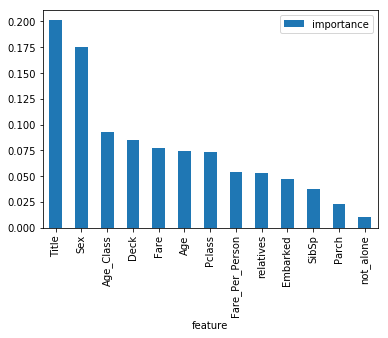

In [45]:
importances.plot.bar()

c.- Eliminamos los features "not_alone" y "Parch" dado que no aportan valor al modelo

In [0]:
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

d.- Volvemos a ejecutar el algoritmo de Random Forest

In [47]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()


random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.93 %


In [48]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.26 %


e.- Configuramos adecuadamente el modelo de Random Forest

In [49]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 83.61 %


# 9.- Evaluamos el modelo final

a.- Obtenemos el *Confusion Matrix*

In [50]:
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[492,  57],
       [ 95, 247]])

b.- Obtenemos el valor de *Precision y Recall*

In [51]:
print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8125
Recall: 0.7222222222222222


c.- Obtenemos el *F1 Score*

In [52]:
f1_score(Y_train, predictions)

0.7647058823529411

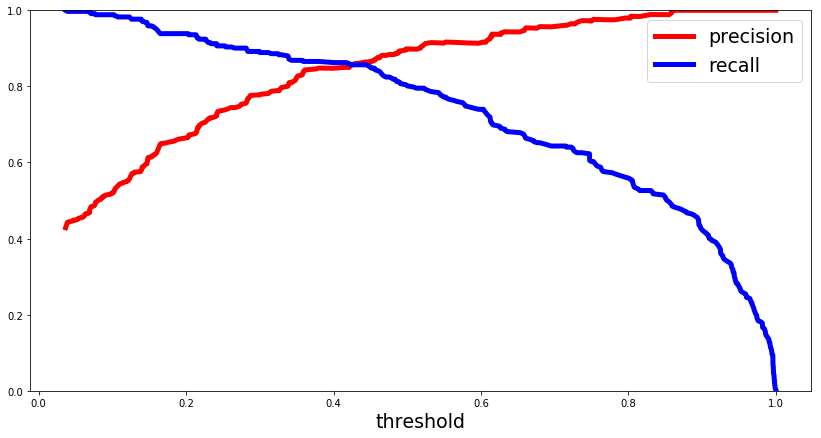

In [53]:
# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

d.- Obtenemos el *ROC AUC Score*

In [61]:
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9458132276653991


# 10.- Prueba Final del modelo

In [62]:
pucp_df_original = pd.read_csv("pucp_workshop.csv")
pucp_df = pucp_df_original.copy()
pucp_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1002,1,"Paico, Mr. Ronald",male,50,1,0,23232,10.4400,A1,S
1,1003,1,"Tejada, Mrs. Claudia",female,40,1,0,363272,70.2200,B60,S
2,1004,2,"Olivas, Mr. Miguel",male,40,0,2,7654,90.6875,C66,Q
3,1005,3,"Vinatea, Mr. Mario",male,55,0,2,315154,66.4300,E67,C
4,1006,3,"Rodriguez, Mrs. Helga",female,22,1,1,3101298,33.0000,G67,S
5,1007,3,"Banner, Mr. Bruce",male,35,0,0,7538,30.0000,F8,S
6,1008,2,"Johanson, Miss. Skarlet",female,25,0,2,330972,7.6292,A89,Q
7,1009,2,"Pereyra, Mr. Claudio",male,18,1,3,248738,29.0000,B99,S
8,1000,3,"Romanoff, Mrs. Natasha",female,22,0,2,2657,7.2292,D78,C
9,1001,3,"Robles, Mr. Samuel",male,21,2,3,A/4 48871,24.1500,E88,S


In [63]:
data=[pucp_df]

createFeatureAloneRelatives(data)
createDeck(data)
setIntFare(data)
createTitle(data)
setSexo(data)
setEmbarked(data)
setRangeAge(data)
setRangeFare(data)
createAgeClass(data)
createFarePerPerson(data)

pucp_df = pucp_df.drop(['Cabin'], axis=1)
pucp_df = pucp_df.drop(['Name'], axis=1)
pucp_df = pucp_df.drop(['Ticket'], axis=1)
pucp_df = pucp_df.drop(['PassengerId'], axis=1)
pucp_df = pucp_df.drop("not_alone", axis=1)
pucp_df = pucp_df.drop("Parch", axis=1)

pucp_df

,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title,Age_Class,Fare_Per_Person
0,1,0,6,1,2,0,1,1,1,6,1
1,1,1,5,1,5,0,1,2,3,5,2
2,2,0,5,0,5,2,2,3,1,10,1
3,3,0,6,0,5,1,2,5,1,18,1
4,3,1,2,1,4,0,2,7,3,6,1
5,3,0,5,0,4,0,0,6,1,15,4
6,2,1,3,0,0,2,2,1,2,6,0
7,2,0,1,1,4,0,4,2,1,2,0
8,3,1,2,0,0,1,2,4,3,6,0
9,3,0,2,2,3,0,5,5,1,6,0


In [64]:
Y_prediction_pucp = random_forest.predict(pucp_df)
Y_prediction_pucp

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [65]:
pucp_df_original["Survived"]=Y_prediction_pucp
pucp_df_original

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1002,1,"Paico, Mr. Ronald",male,50,1,0,23232,10.4400,A1,S,0
1,1003,1,"Tejada, Mrs. Claudia",female,40,1,0,363272,70.2200,B60,S,1
2,1004,2,"Olivas, Mr. Miguel",male,40,0,2,7654,90.6875,C66,Q,0
3,1005,3,"Vinatea, Mr. Mario",male,55,0,2,315154,66.4300,E67,C,0
4,1006,3,"Rodriguez, Mrs. Helga",female,22,1,1,3101298,33.0000,G67,S,1
5,1007,3,"Banner, Mr. Bruce",male,35,0,0,7538,30.0000,F8,S,0
6,1008,2,"Johanson, Miss. Skarlet",female,25,0,2,330972,7.6292,A89,Q,1
7,1009,2,"Pereyra, Mr. Claudio",male,18,1,3,248738,29.0000,B99,S,0
8,1000,3,"Romanoff, Mrs. Natasha",female,22,0,2,2657,7.2292,D78,C,1
9,1001,3,"Robles, Mr. Samuel",male,21,2,3,A/4 48871,24.1500,E88,S,0
